In [17]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

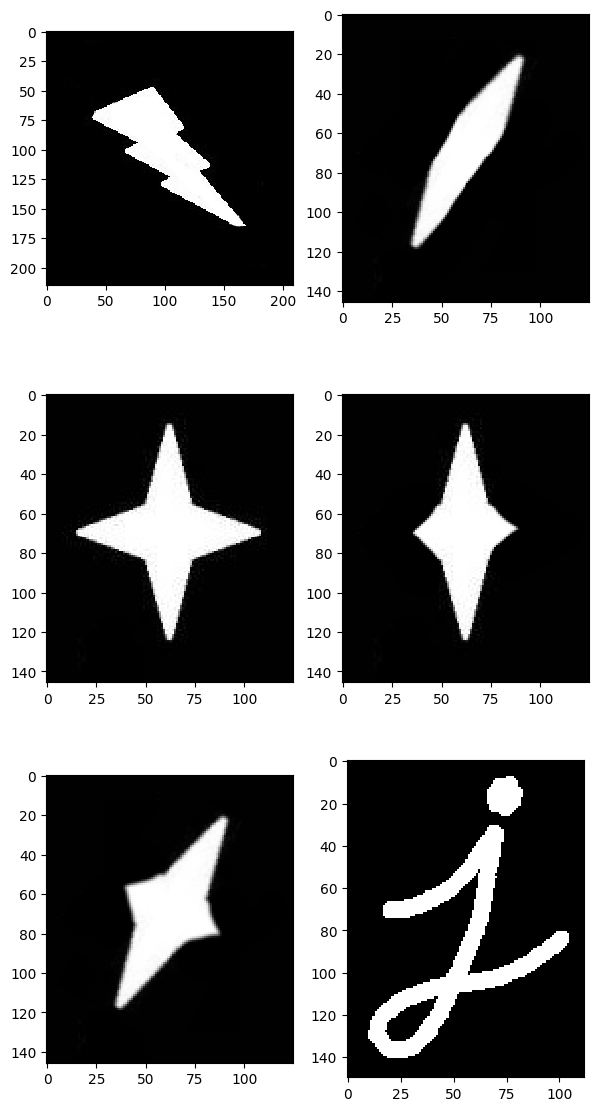

In [32]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [19]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [20]:
#255 because it is white, the actual value makes sense because it is not perfectly white 

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


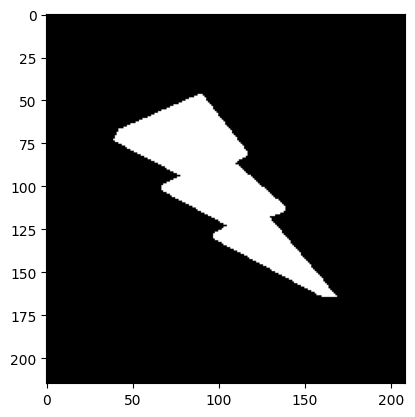

In [21]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [22]:
#A good value is 127.5 (halfway), and thresholding turns grayscale images into black or white (sharpens them)

In [23]:
## TODOse it is assigned another value (may be black). The function used is cv.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Thi
## Your answer

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

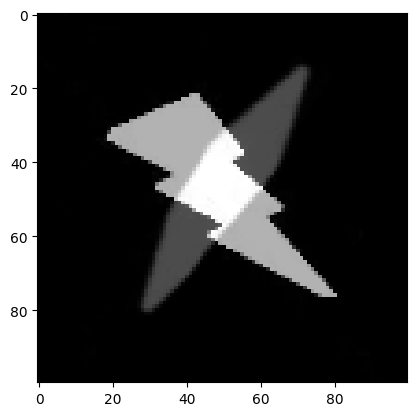

In [34]:
import cv2 as cv
import numpy as np
lightningmod = cv.resize(lightningbolt, (100, 100))
blobmod = cv.resize(blob, (100, 100))


blend = cv.addWeighted(lightningmod,0.7,blobmod,0.3,0)
plt.imshow(blend, cmap = 'grey');

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

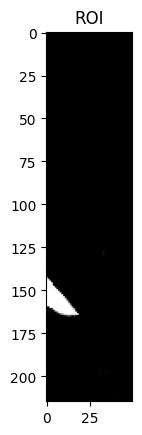

In [ ]:
x1, y1, x2, y2 = 150, 150, 175, 175
roi = lightningbolt[y1:y2, x1:x2]

plt.imshow(roi, cmap = 'grey')
plt.title('ROI')
plt.show()

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

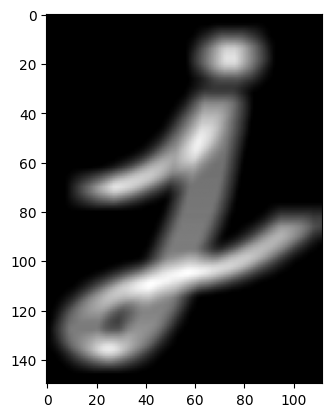

In [38]:
kernel_size = (20,10)
blurred_j = cv2.blur(letterj, kernel_size)

plt.imshow(blurred_j, cmap = 'grey')
plt.show()

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

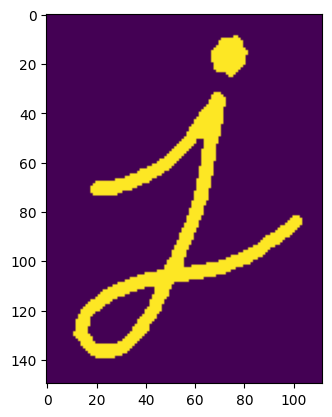

In [40]:
kernel = np.ones((3, 3), np.uint8)
eroded_j = cv2.erode(letterj, kernel, iterations = 1)
plt.imshow(eroded_j)
plt.show()

## 5. Perform erosion on j with a 5x5 kernel

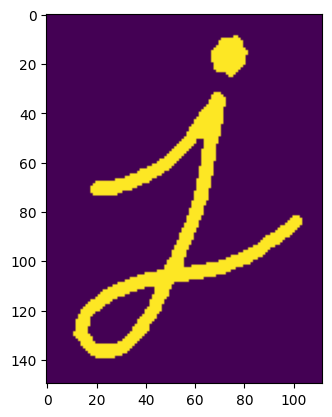

In [41]:
kernel_5x5 = np.ones((5, 5), np.uint8)
eroded_j = cv2.erode(letterj, kernel, iterations = 1)
plt.imshow(eroded_j)
plt.show()

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



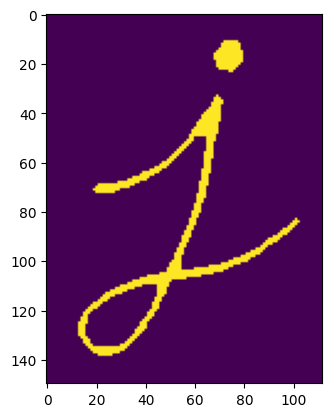

In [42]:
kernel_5x5 = np.ones((5, 5), np.uint8)
eroded_j = cv2.erode(letterj, kernel, iterations = 2)
plt.imshow(eroded_j)
plt.show()

## 7. Perform dilation on j with a 3x3 kernel

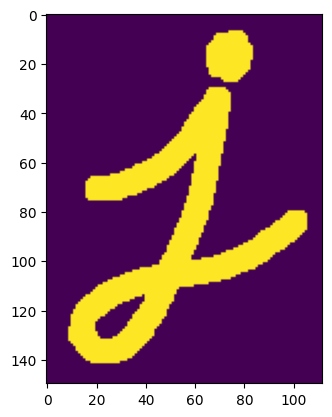

In [44]:
kernel_5x5 = np.ones((3, 3), np.uint8)
dilated_j = cv2.dilate(letterj, kernel, iterations = 1)
plt.imshow(dilated_j)
plt.show()

## 8. Perform dilation on j with a 5x5 kernel

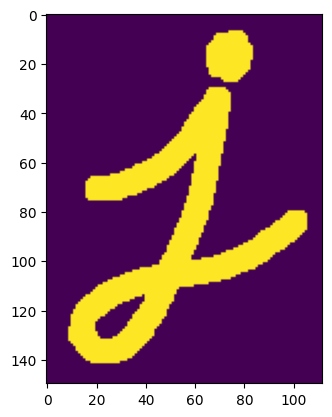

In [45]:
kernel_5x5 = np.ones((5, 5), np.uint8)
dilated_j = cv2.dilate(letterj, kernel, iterations = 1)
plt.imshow(dilated_j)
plt.show()

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
#Size of the affected area of the image that is dilated or eroded   

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
#Repeated iteratins of a morphology operation on a small kernel repeatedly does a small erosion/dilation increasing detail, whereas a single iteration of a large kernel only does the operation once.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

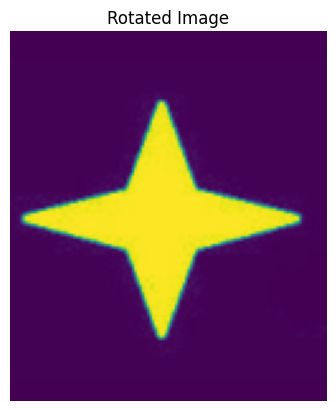

In [46]:
rows, cols = star.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(star, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

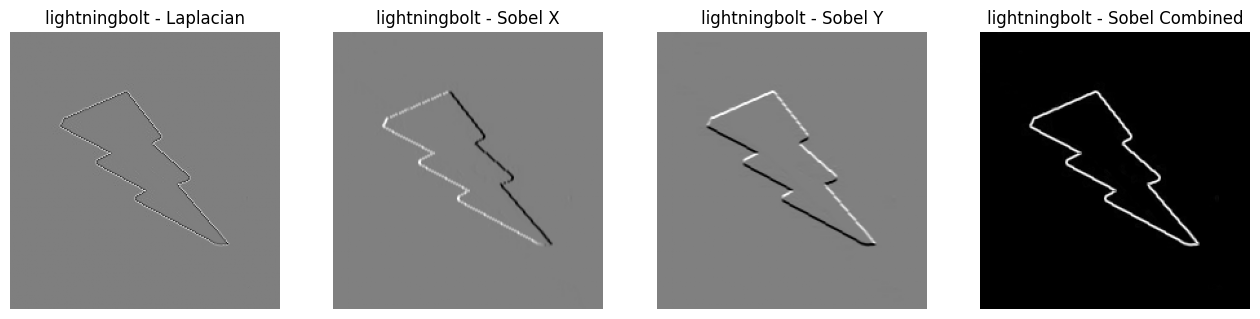

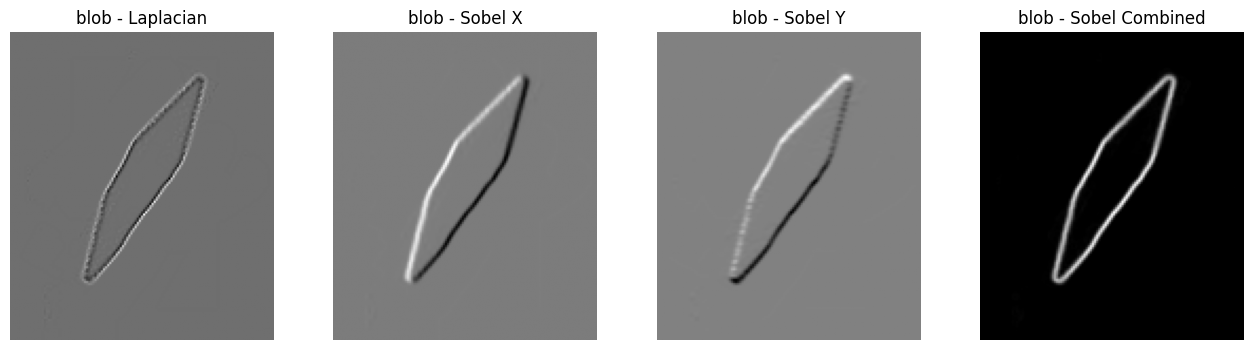

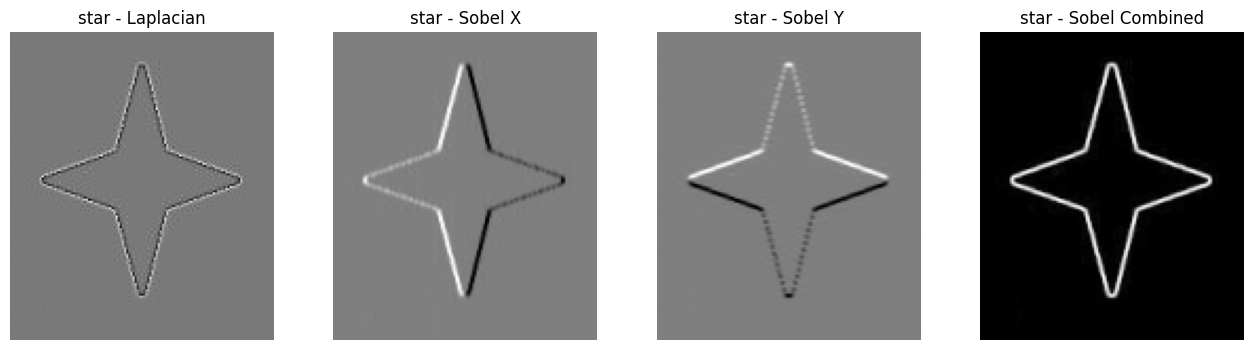

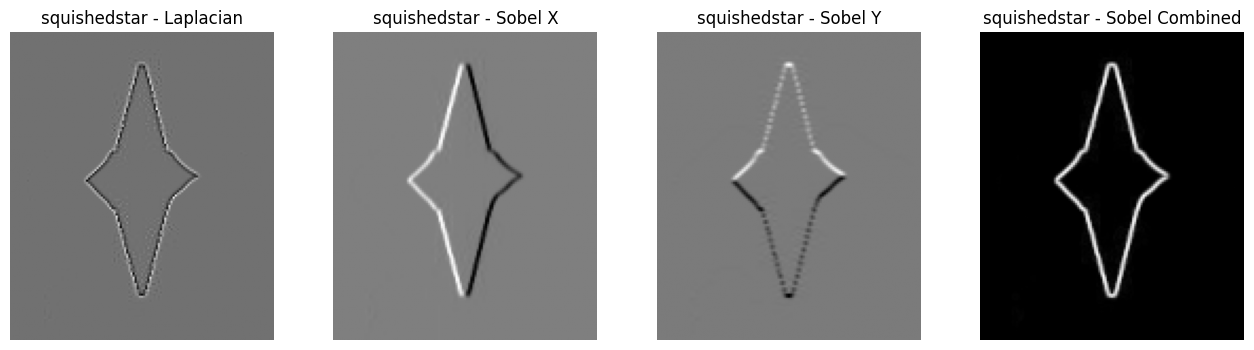

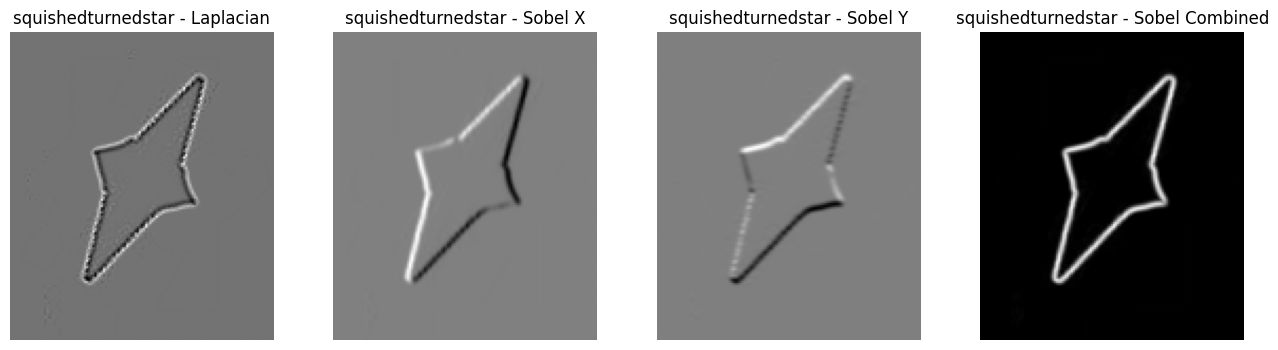

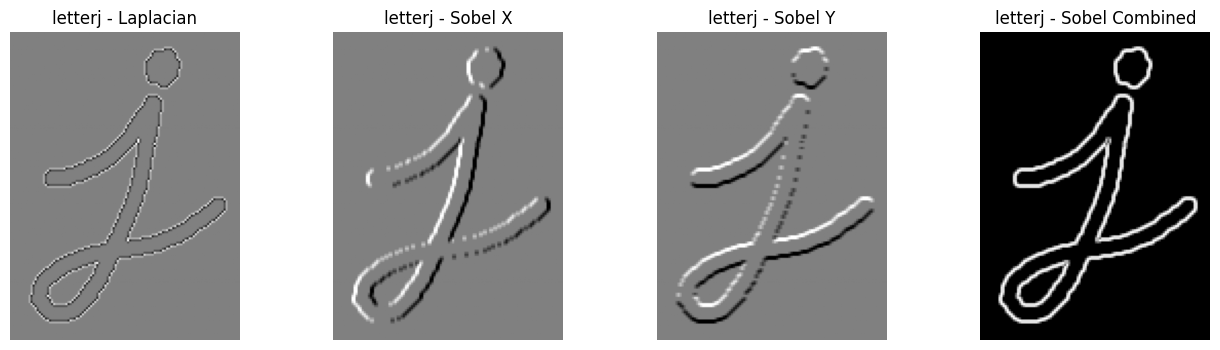

In [47]:
image_names = ['lightningbolt', 'blob', 'star', 'squishedstar', 'squishedturnedstar', 'letterj']
image_list = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

for name, img in zip(image_names, image_list):
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    axs[0].imshow(laplacian, cmap='gray')
    axs[0].set_title(f'{name} - Laplacian')
    axs[1].imshow(sobelx, cmap='gray')
    axs[1].set_title(f'{name} - Sobel X')
    axs[2].imshow(sobely, cmap='gray')
    axs[2].set_title(f'{name} - Sobel Y')
    axs[3].imshow(sobel_combined, cmap='gray')
    axs[3].set_title(f'{name} - Sobel Combined')
    for ax in axs:
        ax.axis('off')
    plt.show()

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 